## Author: Sagar Chadha

### Task 1: Linear Regression

### #GRIPDEC20

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
x = df['Hours']
y = df['Scores']

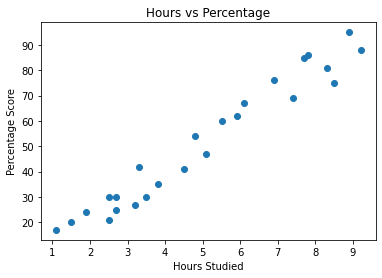

In [6]:
plt.scatter(x, y) 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:>

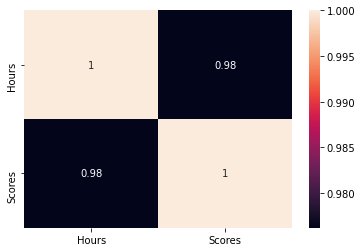

In [7]:
sb.heatmap(df.corr() , annot = True)

there is a positive relation between the number of hours studied and percentage of score(.98)

### **Preparing the data**

Assigning the target variable

In [8]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


### Model Training
splited our data into train and test datasets 

In [10]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression()

In [11]:
train_accuracy = model.score(x_train,y_train)
test_accuracy = model.score(x_test,y_test)
print(train_accuracy)
print(test_accuracy)

0.9515510725211552
0.9454906892105356


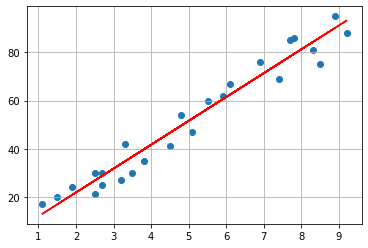

In [12]:
# Plotting the regression line
y_pred = model.coef_*x +model.intercept_  #(y = mx + c)

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, y_pred , color = "r")
plt.grid()
plt.show()

###  Predictions


In [13]:
print(x_test) 
y_pred = model.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


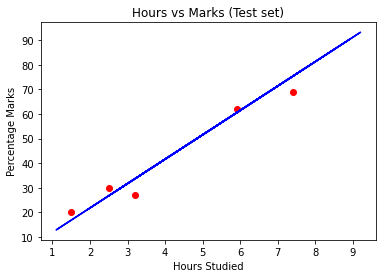

In [14]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Hours vs Marks (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Marks')
plt.show()

In [15]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The last step is to evaluate the performance of model.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print("Training Set Accuracy: {}%".format(train_accuracy*100))


Mean Absolute Error: 4.183859899002975
Training Set Accuracy: 95.15510725211553%
